In [68]:
# import librairies

import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Créer la table person dans la base de données choisie.

In [69]:
# création de la database HDH

connection = sqlite3.connect("hdh.db")
cursor = connection.cursor()

# création de la table person dans la BDD HDH

cursor.execute('''
		CREATE TABLE IF NOT EXISTS person (
			person_id int primary key,
			person_source_value text,
			gender_concept_id int,
            year_of_birth int
			)
               ''')

connection.commit()

#### 2. Ouvrir les tables T_MCOAAC et T_MCOAAB, et enlever les doublons et les valeurs manquantes. Calculer le nombre de lignes pour chaque table, la distribution homme/femme de la table T_MCOAAB.

In [70]:
# importation des 2 fichiers csv en dataframes

mcoaab_df = pd.read_csv(r'T_MCOaaB.csv', sep=',')
mcoaac_df = pd.read_csv(r'T_MCOaaC.csv', sep='|')

In [71]:
# vérifications du bon import des fichiers

mcoaab_df.head()
mcoaac_df.head()

,NIR_ANO_17,RSA_NUM,ETA_NUM,COH_NAI_RET,COH_SEX_RET,DAT_RET,ENT_DAT,ETA_NUM_RET,EXE_SOI_AMD,EXE_SOI_AMF,...,SEJ_MER_RET,SEJ_NUM,SEJ_RET,SEX_RET,SOR_ANN,SOR_DAT,SOR_MOI,VID_HOSP_FOR,ENT_AM,SOR_AM
0,fiosftusfZACfuNhE,6766543446,250010162,True,False,c,5122013,True,198104,198104,...,True,31556,False,True,2014,1012014,6,418,199211,199211
1,fiosftusfZACfuNhE,1778813122,470015009,True,True,v,10032016,True,201310,201310,...,False,97756,False,True,1998,15042016,6,509,197208,197208
2,fiosftusfZACfuNhE,6079331430,30005540,False,True,Q,8021998,False,201106,201106,...,False,81628,False,False,2005,11031998,1,785,197205,197206
3,fiosftusfZACfuNhE,8205197405,750039182,False,False,V,18072010,False,201710,201711,...,False,69840,True,True,2001,18082010,2,410,201302,201302
4,fiosftusfZACfuNhE,8501373207,920003399,True,True,u,10111986,True,201208,201208,...,True,65673,False,False,1996,26111986,9,237,201211,201212


In [72]:
# supression des doublons en prenant en compte le double critères d'unicité ETA_NUM + RSA_NUM

mcoaab_df2 = mcoaab_df.drop_duplicates(subset=['ETA_NUM','RSA_NUM'])
mcoaac_df2 = mcoaac_df.drop_duplicates(subset=['ETA_NUM','RSA_NUM'])


In [73]:
# vérifications de l'existence de valeurs manquantes dans toutes les colonnes

mcoaab_df2.isnull().sum()
mcoaac_df2.isnull().sum()

NIR_ANO_17         0
RSA_NUM            0
ETA_NUM            0
COH_NAI_RET        0
COH_SEX_RET        0
DAT_RET            0
ENT_DAT            0
ETA_NUM_RET        0
EXE_SOI_AMD        0
EXE_SOI_AMF        0
EXE_SOI_DTD        0
EXE_SOI_DTF        0
FHO_RET            0
FOR_NUM            0
HOS_NN_MAM         0
HOS_NNE_RET        0
HOS_ORG_RET        0
HOS_PLO            0
NAI_RET            0
NIR_ANO_MAM        0
NIR_RET            0
NUM_DAT_AT         0
NUM_DAT_AT_RET     0
ORG_CPL_NUM        0
ORG_CPL_NUM_RET    0
PMS_RET            0
RNG_BEN            0
RNG_BEN_RET        0
RNG_NAI            0
RNG_NAI_RET        0
SEJ_MER_RET        0
SEJ_NUM            0
SEJ_RET            0
SEX_RET            0
SOR_ANN            0
SOR_DAT            0
SOR_MOI            0
VID_HOSP_FOR       0
ENT_AM             0
SOR_AM             0
dtype: int64

In [74]:
# Suppression valeurs manquantes

mcoaab_df2_copy = mcoaab_df2.copy()
mcoaab_df2_copy.dropna(subset=["ETA_NUM","RSA_NUM"], inplace=True)

mcoaac_df2_copy = mcoaac_df2.copy()
mcoaac_df2_copy.dropna(subset=["ETA_NUM", "RSA_NUM"], inplace=True)

In [75]:
# calcul nombre de lignes pour chaque table
vol1 = len(mcoaab_df2_copy)
vol2 = len(mcoaac_df2_copy)

f"Nombre de lignes de la table T_MCOaaB : {vol1}"
f"Nombre de lignes de la table T_MCOaaC : {vol2}"


'Nombre de lignes de la table T_MCOaaC : 514'

In [76]:
# distribution homme/femme de la table T_MCOaaB

cs = mcoaab_df2_copy["COD_SEX"][mcoaab_df2_copy["COD_SEX"].isin([1,2])]

volume = cs.value_counts()
ratio = cs.value_counts(normalize=True)
pourcentage = cs.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'VOLUME': volume, 'RATIO': ratio, 'POURCENTAGE': pourcentage})

,VOLUME,RATIO,POURCENTAGE
2,190,0.535211,53.5%
1,165,0.464789,46.5%


#### 3. Remplir la colonne **person_source_value** de la table *person*.

In [77]:
# joindre les 2 dataframes

joined_df = pd.merge(
    mcoaab_df2_copy,mcoaac_df2_copy,
    on = ['ETA_NUM','RSA_NUM'],
    how = 'inner'
)

joined_df

,ETA_NUM,RSA_NUM,AGE_ANN,AGE_GES,AGE_JOU,ANT_SUP_NBR,AUT_PGV_NBR,BDI_COD,BDI_DEP,BEB_SEJ,...,SEJ_MER_RET,SEJ_NUM,SEJ_RET,SEX_RET,SOR_ANN_y,SOR_DAT,SOR_MOI_y,VID_HOSP_FOR,ENT_AM,SOR_AM
0,250010162,6766543446,99,12,,727,2,xXBaw,Rl,N,...,True,31556,False,True,2014,1012014,6,418,199211,199211
1,470015009,1778813122,11,21,,145,1,cEYAy,OB,R,...,False,97756,False,True,1998,15042016,6,509,197208,197208
2,930021001,7040927016,117,15,,659,2,qLjMe,rJ,D,...,True,64042,False,True,1979,12032007,4,847,199112,199112
3,130041403,4301299151,109,29,,398,1,EqJNQ,lN,r,...,True,59750,True,False,2018,2121997,6,218,200912,201001
4,770816072,7664212316,26,37,,684,1,iqpPr,AK,h,...,True,87966,False,True,1969,5051995,7,668,200008,200009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,930061270,6711794923,98,19,,672,1,Qjulo,eU,c,...,True,26165,False,False,1988,19071973,8,168,199808,199809
510,60792215,9104936302,32,28,,869,2,WujuZ,yh,J,...,False,29358,True,True,1971,19101993,6,239,198303,198303
511,250005428,8103764064,109,20,,961,0,JfUme,Zp,Z,...,True,34561,False,False,1971,10022007,11,868,197404,197404
512,60017977,3508545843,80,30,,23,2,XDMBY,bp,A,...,False,64533,True,False,1979,24052008,7,823,197202,197203


In [78]:
# création d'un dataframe avec les colonnes d'intérêts
cleaned_df = joined_df[['ETA_NUM','RSA_NUM','NIR_ANO_17','COD_SEX','AGE_ANN','EXE_SOI_DTD']]

cleaned_df

,ETA_NUM,RSA_NUM,NIR_ANO_17,COD_SEX,AGE_ANN,EXE_SOI_DTD
0,250010162,6766543446,fiosftusfZACfuNhE,1,99,28Sep1972:22:09:18
1,470015009,1778813122,fiosftusfZACfuNhE,1,11,07May1989:22:18:08
2,930021001,7040927016,vOdcyEdhBVIvrtocZ,2,117,14Jul2002:12:30:52
3,130041403,4301299151,vOdcyEdhBVIvrtocZ,2,109,10Apr1985:19:25:50
4,770816072,7664212316,vOdcyEdhBVIvrtocZ,9,26,15Feb1982:10:50:29
...,...,...,...,...,...,...
509,930061270,6711794923,xllHLbfuGaAjEBFSH,2,98,12Mar2020:06:29:47
510,60792215,9104936302,xllHLbfuGaAjEBFSH,2,32,05Jun1999:12:37:58
511,250005428,8103764064,xllHLbfuGaAjEBFSH,1,109,07Sep2001:14:02:13
512,60017977,3508545843,xllHLbfuGaAjEBFSH,1,80,02Oct2006:16:34:23


In [79]:
# Renommer la colonne NIR_ANO_17 en person_source_value 
cleaned_df2 = cleaned_df.copy()
cleaned_df2.rename({"NIR_ANO_17": "person_source_value"}, axis=1, inplace=True)
cleaned_df2

,ETA_NUM,RSA_NUM,person_source_value,COD_SEX,AGE_ANN,EXE_SOI_DTD
0,250010162,6766543446,fiosftusfZACfuNhE,1,99,28Sep1972:22:09:18
1,470015009,1778813122,fiosftusfZACfuNhE,1,11,07May1989:22:18:08
2,930021001,7040927016,vOdcyEdhBVIvrtocZ,2,117,14Jul2002:12:30:52
3,130041403,4301299151,vOdcyEdhBVIvrtocZ,2,109,10Apr1985:19:25:50
4,770816072,7664212316,vOdcyEdhBVIvrtocZ,9,26,15Feb1982:10:50:29
...,...,...,...,...,...,...
509,930061270,6711794923,xllHLbfuGaAjEBFSH,2,98,12Mar2020:06:29:47
510,60792215,9104936302,xllHLbfuGaAjEBFSH,2,32,05Jun1999:12:37:58
511,250005428,8103764064,xllHLbfuGaAjEBFSH,1,109,07Sep2001:14:02:13
512,60017977,3508545843,xllHLbfuGaAjEBFSH,1,80,02Oct2006:16:34:23


#### 4. Remplir la colonne gender_concept_id de la table person avec les équivalents au format OMOP-CDM, et enlever les patients pour qui le sexe n'est pas défini dans le SNDS classique.

In [80]:
# conversion du cod_sex au format OMOP-CDM
gender_id = {1: 8507, 2: 8532, 9:9}
cleaned_df2["gender_concept_id"] = cleaned_df2["COD_SEX"].map(gender_id)

cleaned_df2

,ETA_NUM,RSA_NUM,person_source_value,COD_SEX,AGE_ANN,EXE_SOI_DTD,gender_concept_id
0,250010162,6766543446,fiosftusfZACfuNhE,1,99,28Sep1972:22:09:18,8507
1,470015009,1778813122,fiosftusfZACfuNhE,1,11,07May1989:22:18:08,8507
2,930021001,7040927016,vOdcyEdhBVIvrtocZ,2,117,14Jul2002:12:30:52,8532
3,130041403,4301299151,vOdcyEdhBVIvrtocZ,2,109,10Apr1985:19:25:50,8532
4,770816072,7664212316,vOdcyEdhBVIvrtocZ,9,26,15Feb1982:10:50:29,9
...,...,...,...,...,...,...,...
509,930061270,6711794923,xllHLbfuGaAjEBFSH,2,98,12Mar2020:06:29:47,8532
510,60792215,9104936302,xllHLbfuGaAjEBFSH,2,32,05Jun1999:12:37:58,8532
511,250005428,8103764064,xllHLbfuGaAjEBFSH,1,109,07Sep2001:14:02:13,8507
512,60017977,3508545843,xllHLbfuGaAjEBFSH,1,80,02Oct2006:16:34:23,8507


In [81]:
# supression lignes dont le sexe n'est pas défini
cleaned_df2 = cleaned_df2[cleaned_df2["COD_SEX"]!=9]
cleaned_df2["COD_SEX"].value_counts()

2    190
1    165
Name: COD_SEX, dtype: int64

#### 5. Créer un identifiant unique person_id tel qu'un person_source_value corresponde à un person_id. On demande ici de créer un nouvel identifiant, qui dépende uniquement de person_source_value. Par exemple, il faut imaginer que les valeurs de person_source_value sont des numéros de sécurité sociale: ce sont des données sensibles qu'on ne peut pas utiliser telles quelles.

In [93]:
# création d'un id unique par person_source_value

def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

    
cleaned_df2["person_id"] = cleaned_df2['person_source_value'].apply(generate_id)
cleaned_df2 

/var/folders/xp/ksj0jttd6ls22mkzhq89z7zm0000gn/T/ipykernel_2367/4061182175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["person_id"] = cleaned_df2['person_source_value'].apply(generate_id)


,ETA_NUM,RSA_NUM,person_source_value,COD_SEX,AGE_ANN,EXE_SOI_DTD,gender_concept_id,person_id,year_of_birth,gender
0,250010162,6766543446,fiosftusfZACfuNhE,1,99,1972-09-28 22:09:18,8507,6662318665,1873,Male
1,470015009,1778813122,fiosftusfZACfuNhE,1,11,1989-05-07 22:18:08,8507,6662318665,1978,Male
2,930021001,7040927016,vOdcyEdhBVIvrtocZ,2,117,2002-07-14 12:30:52,8532,5316712455,1885,Female
3,130041403,4301299151,vOdcyEdhBVIvrtocZ,2,109,1985-04-10 19:25:50,8532,5316712455,1876,Female
6,750039182,8205197405,fiosftusfZACfuNhE,2,80,2013-02-14 18:02:01,8532,6662318665,1933,Female
...,...,...,...,...,...,...,...,...,...,...
509,930061270,6711794923,xllHLbfuGaAjEBFSH,2,98,2020-03-12 06:29:47,8532,7169594839,1922,Female
510,60792215,9104936302,xllHLbfuGaAjEBFSH,2,32,1999-06-05 12:37:58,8532,7169594839,1967,Female
511,250005428,8103764064,xllHLbfuGaAjEBFSH,1,109,2001-09-07 14:02:13,8507,7169594839,1892,Male
512,60017977,3508545843,xllHLbfuGaAjEBFSH,1,80,2006-10-02 16:34:23,8507,7169594839,1926,Male


#### 6. Calculer l'année de naissance à partir des tables T_MCOAAC (utiliser la variable EXE_SOI_DTD) et T_MCOAAB (utiliser la variable AGE_ANN).

In [83]:
# conversion au format date 
cleaned_df2["EXE_SOI_DTD"] = pd.to_datetime(cleaned_df2['EXE_SOI_DTD'], format='%d%b%Y:%H:%M:%S')


/var/folders/xp/ksj0jttd6ls22mkzhq89z7zm0000gn/T/ipykernel_2367/3031381115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["EXE_SOI_DTD"] = pd.to_datetime(cleaned_df2['EXE_SOI_DTD'], format='%d%b%Y:%H:%M:%S')


In [84]:
# reformatage de la date d'entrée
cleaned_df2["EXE_SOI_DTD"] = pd.to_datetime(cleaned_df2['EXE_SOI_DTD'], format='%d%b%Y:%H:%M:%S')

# extraction de la date d'entrée
entry_year = pd.DatetimeIndex(cleaned_df2["EXE_SOI_DTD"]).year

# calcul de year_of_birth se basant sur l'âge à la date d'entrée
cleaned_df2["year_of_birth"] = entry_year - cleaned_df2["AGE_ANN"]
cleaned_df2

/var/folders/xp/ksj0jttd6ls22mkzhq89z7zm0000gn/T/ipykernel_2367/1433018296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["EXE_SOI_DTD"] = pd.to_datetime(cleaned_df2['EXE_SOI_DTD'], format='%d%b%Y:%H:%M:%S')
/var/folders/xp/ksj0jttd6ls22mkzhq89z7zm0000gn/T/ipykernel_2367/1433018296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["year_of_birth"] = entry_year - cleaned_df2["AGE_ANN"]


,ETA_NUM,RSA_NUM,person_source_value,COD_SEX,AGE_ANN,EXE_SOI_DTD,gender_concept_id,person_id,year_of_birth
0,250010162,6766543446,fiosftusfZACfuNhE,1,99,1972-09-28 22:09:18,8507,6662318665,1873
1,470015009,1778813122,fiosftusfZACfuNhE,1,11,1989-05-07 22:18:08,8507,6662318665,1978
2,930021001,7040927016,vOdcyEdhBVIvrtocZ,2,117,2002-07-14 12:30:52,8532,5316712455,1885
3,130041403,4301299151,vOdcyEdhBVIvrtocZ,2,109,1985-04-10 19:25:50,8532,5316712455,1876
6,750039182,8205197405,fiosftusfZACfuNhE,2,80,2013-02-14 18:02:01,8532,6662318665,1933
...,...,...,...,...,...,...,...,...,...
509,930061270,6711794923,xllHLbfuGaAjEBFSH,2,98,2020-03-12 06:29:47,8532,7169594839,1922
510,60792215,9104936302,xllHLbfuGaAjEBFSH,2,32,1999-06-05 12:37:58,8532,7169594839,1967
511,250005428,8103764064,xllHLbfuGaAjEBFSH,1,109,2001-09-07 14:02:13,8507,7169594839,1892
512,60017977,3508545843,xllHLbfuGaAjEBFSH,1,80,2006-10-02 16:34:23,8507,7169594839,1926


In [85]:
# vérification de la présence d'années de naissance aberrantes
#cleaned_df2[cleaned_df2["year_of_birth"] < 0]
#cleaned_df2
cleaned_df2.loc[172]


ETA_NUM                          830009122
RSA_NUM                         4621556103
person_source_value      BOVHszVYePPTeDTib
COD_SEX                                  2
AGE_ANN                                  1
EXE_SOI_DTD            2001-02-22 17:50:21
gender_concept_id                     8532
person_id                       3618162675
year_of_birth                         2000
Name: 172, dtype: object

#### 7. Produire un graphique représentant, pour chaque sexe, la distribution des dates de naissance. Si vous produisez un script et pas un notebook, veillez à sauvegarder la figure résultante.

/var/folders/xp/ksj0jttd6ls22mkzhq89z7zm0000gn/T/ipykernel_2367/508628490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2["gender"] = cleaned_df2["gender_concept_id"].map(gender)


Text(0.5, 0, 'Year of Birth')

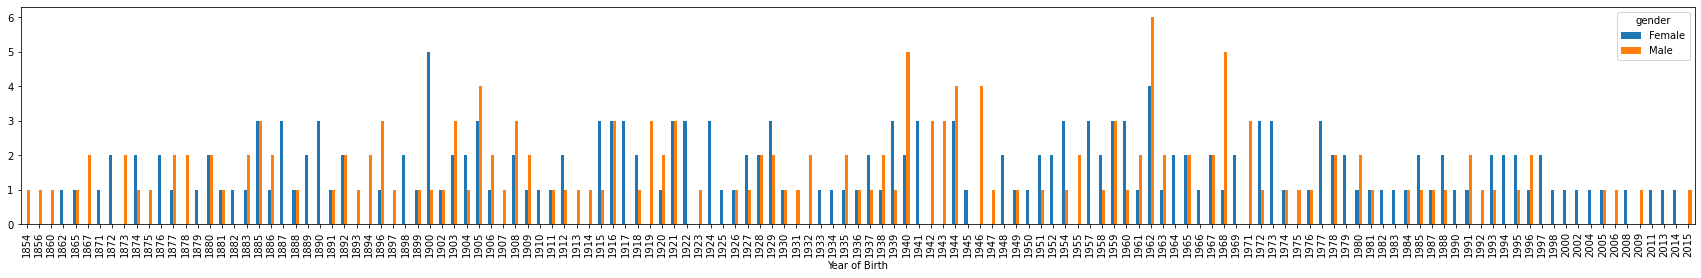

In [86]:
# ajout une nouvelle colonne gender dans le df
gender = {8507: "Male", 8532: "Female"}
cleaned_df2["gender"] = cleaned_df2["gender_concept_id"].map(gender)

# réprésentation de la distribution hommes / femmes en f(x) de la date de naissance
by_year_gender = cleaned_df2.groupby(["year_of_birth","gender"])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(30,4))
plt.xlabel("Year of Birth")


In [87]:
# création d'un dataframe avec la même structure que la table présente dans la BDD créée
person = cleaned_df2[["person_id","person_source_value","gender_concept_id","year_of_birth"]]
person

,person_id,person_source_value,gender_concept_id,year_of_birth
0,6662318665,fiosftusfZACfuNhE,8507,1873
1,6662318665,fiosftusfZACfuNhE,8507,1978
2,5316712455,vOdcyEdhBVIvrtocZ,8532,1885
3,5316712455,vOdcyEdhBVIvrtocZ,8532,1876
6,6662318665,fiosftusfZACfuNhE,8532,1933
...,...,...,...,...
509,7169594839,xllHLbfuGaAjEBFSH,8532,1922
510,7169594839,xllHLbfuGaAjEBFSH,8532,1967
511,7169594839,xllHLbfuGaAjEBFSH,8507,1892
512,7169594839,xllHLbfuGaAjEBFSH,8507,1926


In [88]:
person.to_sql("person", connection, if_exists='replace', index = False)
 
connection.commit()

In [89]:
cursor.execute('''  
select * from person limit 3
          ''')

for row in cursor.fetchall():
    print (row)

(6662318665, 'fiosftusfZACfuNhE', 8507, 1873)
(6662318665, 'fiosftusfZACfuNhE', 8507, 1978)
(5316712455, 'vOdcyEdhBVIvrtocZ', 8532, 1885)


In [90]:
connection.commit()

#### 8. Ecrire un script en bash permettant de récupérer `person.csv` (en utilisant "|" comme délimiteur). Récupérer **person_id**, **gender_concept_id** et **year_of_birth**. Pour chaque **gender_concept_id**, afficher le plus grand **year_of_birth** avec le **person_id** correspondant.

```
sqlite3 #hdh.db
sqlite> .mode csv
sqlite> .separator "|"
sqlite> .headers on
sqlite> .output person.csv
sqlite> SELECT * from person;
```

In [91]:
# pour chaque gender_concept_id, affichage du plus grand year_of_birth

cursor.execute(''' 
   SELECT gender_concept_id, person_id, year_of_birth
   FROM person
   WHERE year_of_birth in (
   SELECT max(year_of_birth)
      FROM person
      GROUP BY gender_concept_id
      )
   GROUP BY 1,2,3
''' 
)

for row in cursor.fetchall():
    print (row)


(8507, 8156059221, 2015)
(8532, 2643492996, 2014)


In [92]:
connection.close()